# Taller 9

### Aprendizaje en Redes Bayesianas: Estructura

##### Analítica Computacional para la Toma de Decisiones

---

|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |

## Estimando la estructura de un modelo a partir de datos: __Restricciones__

## Librerías Requeridas

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

### 1 - Carga de Datos

In [2]:
df = pd.read_csv("../Data/data_asia.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

df.head()

,asia,tub,smoke,lung,bronc,either,xray,dysp
0,no,no,no,no,yes,no,no,no
1,no,no,no,yes,no,yes,yes,no
2,no,no,no,no,no,no,no,no
3,no,no,yes,no,yes,no,no,yes
4,no,no,yes,no,no,no,no,no


In [3]:
df.describe()

,asia,tub,smoke,lung,bronc,either,xray,dysp
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,2,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no,no
freq,99057,98917,50054,94501,55093,93477,88991,56376


In [4]:
df.columns

Index(['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'], dtype='object')

### 2 - Estimación de Estructura

In [5]:
est = PC(data=df)
estimated_model = est.estimate(variant="stable", max_cond_vars=4)

  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
print(estimated_model)
print(estimated_model.nodes())
print(estimated_model.edges())

DAG with 8 nodes and 8 edges
['tub', 'either', 'lung', 'bronc', 'dysp', 'xray', 'asia', 'smoke']
[('tub', 'either'), ('either', 'dysp'), ('either', 'xray'), ('lung', 'either'), ('bronc', 'dysp'), ('asia', 'tub'), ('smoke', 'bronc'), ('smoke', 'lung')]


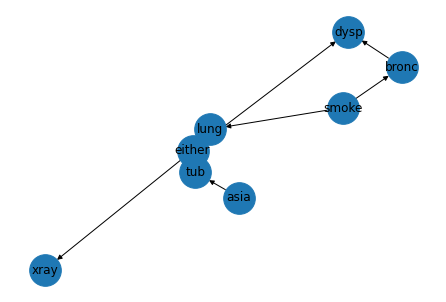

In [7]:
nodes = list(estimated_model.nodes())
edges = list(estimated_model.edges())

# Create Graph
G = nx.DiGraph()

# Add Nodes
for node in nodes:
    G.add_node(node)
    
# Add Edges
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# Draw Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()

### 3 - Red Bayesiana

In [8]:
estimated_model = BayesianNetwork(estimated_model)
estimated_model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [9]:
for i in estimated_model.nodes():
    print(estimated_model.get_cpds(i))

+----------+----------------------+---------------------+
| asia     | asia(no)             | asia(yes)           |
+----------+----------------------+---------------------+
| tub(no)  | 0.9895918511564049   | 0.9448568398727466  |
+----------+----------------------+---------------------+
| tub(yes) | 0.010408148843595103 | 0.05514316012725345 |
+----------+----------------------+---------------------+
+-------------+----------+----------+-----------+-----------+
| lung        | lung(no) | lung(no) | lung(yes) | lung(yes) |
+-------------+----------+----------+-----------+-----------+
| tub         | tub(no)  | tub(yes) | tub(no)   | tub(yes)  |
+-------------+----------+----------+-----------+-----------+
| either(no)  | 1.0      | 0.0      | 0.0       | 0.0       |
+-------------+----------+----------+-----------+-----------+
| either(yes) | 0.0      | 1.0      | 1.0       | 1.0       |
+-------------+----------+----------+-----------+-----------+
+-----------+----------------------+